In [12]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal
from scipy.linalg import cholesky, solve_triangular
import seaborn as sns

In [13]:
def kernel(xa, xb, amp, ll):
    Xa, Xb = get_tiled(xa, xb)
    return amp**2 * np.exp(-0.5 * 1./ll**2 * (Xa - Xb)**2 )

def get_tiled(xa, xb):
    m, n = len(xa), len(xb)
    xa, xb = xa.reshape(m,1) , xb.reshape(n,1)
    Xa = np.tile(xa, (1, n))
    Xb = np.tile(xb.T, (m, 1))
    return Xa, Xb

def get_posterior(amp, ll, x, x_data, y_data, noise):
    u = y_data.shape[0]
    mu_y = np.mean(y_data)
    y = (y_data - mu_y).reshape(u,1)
    Sigma = noise * np.eye(u)
    
    Kxx = kernel(x_data, x_data, amp, ll)
    Kxpx = kernel(x, x_data, amp, ll)
    Kxpxp = kernel(x, x, amp, ll)
    
    # Inverse
    jitter = np.eye(u) * 1e-12
    L = cholesky(Kxx + Sigma + jitter)
    S1 = solve_triangular(L.T, y, lower=True)
    S2 = solve_triangular(L.T, Kxpx.T, lower=True).T
    
    mu = S2 @ S1  + mu_y
    cov = Kxpxp - S2 @ S2.T
    return mu, cov

In [26]:
X = np.linspace(0, 1, 100)

def get_prior(X):
    mu = np.zeros_like(X)
    cov = kernel(X, X, amp=1.0, ll=0.25)
    prior = multivariate_normal(mu, cov, allow_singular=True)
    return prior

In [27]:
def random_sample3():
    zj_1 = get_prior(X)
    us = []
    for j in range(0, 6):
        uj = zj_1.rvs(1)
        zj = get_prior(zj_1.rvs(1))
        zj_1 = zj
        us.append(uj)
    return us


G = 10
U1c = np.zeros((G, 100))
U2c = np.zeros((G, 100))
U3c = np.zeros((G, 100))
U4c = np.zeros((G, 100))
for j in range(0, G):
    us = random_sample3()
    U1c[j,:] = us[-4]
    U2c[j,:] = us[-3]
    U3c[j,:] = us[-2]
    U4c[j,:] = us[-1]

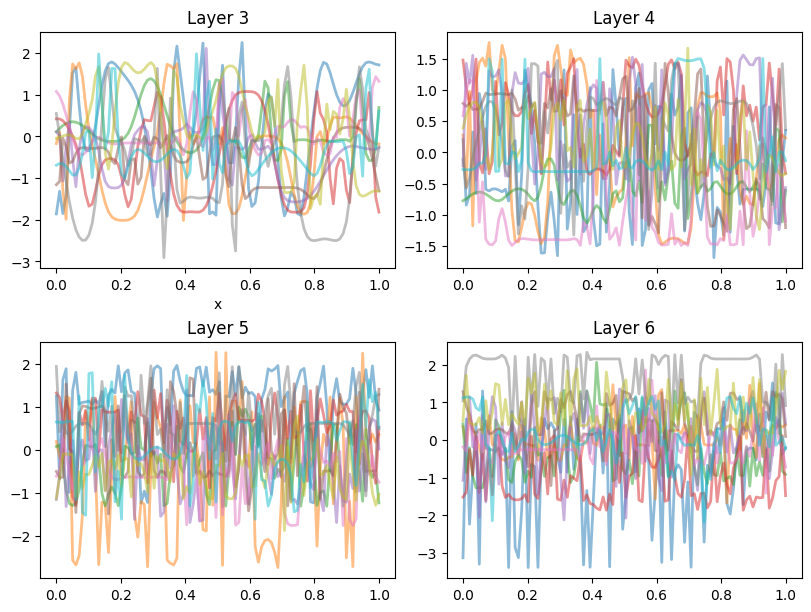

In [28]:
fig = plt.figure(layout='constrained', figsize=(8, 6))
plt.subplot(221)
plt.title('Layer 3')
plt.plot(X, U1c.T, alpha=0.5, lw=2)
plt.xlabel('x')
plt.subplot(222)
plt.title('Layer 4')
plt.plot(X, U2c.T, alpha=0.5, lw=2)
plt.subplot(223)
plt.title('Layer 5')
plt.plot(X, U3c.T, alpha=0.5, lw=2)
plt.subplot(224)
plt.title('Layer 6')
plt.plot(X, U4c.T, alpha=0.5, lw=2)
plt.savefig('layers1.png', dpi=170, bbox_inches='tight', transparent=True)
plt.show()

In [19]:
U4c

array([[ 0.79651676,  0.79651671,  0.79651677,  0.79651642,  0.79651664,
         0.79651673,  0.79651678,  0.79651627,  0.79651637,  0.79651643,
         0.79651614,  0.79651623,  0.79651647,  0.79651617,  0.79651595,
         0.79651611,  0.79651594,  0.7965161 ,  0.79651559,  0.79651593,
         0.79651575,  0.79651581,  0.79651579,  0.79651574,  0.79651571,
         0.79651558,  0.79651548,  0.79651542,  0.79651528,  0.79651551,
         0.7965153 ,  0.79651531,  0.79651533,  0.79651549,  0.79651516,
         0.79651539,  0.79651516,  0.79651488,  0.79651496,  0.79651509,
         0.79651528,  0.79651518,  0.79651531,  0.79651532,  0.79651542,
         0.79651544,  0.79651547,  0.79651541,  0.79651555,  0.79651548,
         0.79651558,  0.79651576,  0.79651582,  0.7965159 ,  0.79651596,
         0.79651591,  0.79651609,  0.79651614,  0.79651629,  0.796516  ,
         0.79651583,  0.79651651,  0.79651644,  0.79651667,  0.79651618,
         0.79651665,  0.7965166 ,  0.79651671,  0.7

In [ ]:
asdasd

In [ ]:
def random_sample():
    z1 = get_prior(X)
    u1 = z1.rvs(1)
    z2 = get_prior(z1.rvs(1))
    u2 = z2.rvs(1)
    z3 = get_prior(z2.rvs(1))
    u3 = z3.rvs(1)
    z4 = get_prior(z3.rvs(1))
    u4 = z4.rvs(1)
    return u1, u2, u3, u4

G = 15
U1 = np.zeros((G, 100))
U2 = np.zeros((G, 100))
U3 = np.zeros((G, 100))
U4 = np.zeros((G, 100))
for j in range(0, G):
    u1, u2, u3, u4 = random_sample()
    U1[j,:] = u1
    U2[j,:] = u2
    U3[j,:] = u3
    U4[j,:] = u4

In [ ]:
fig = plt.figure(layout='constrained', figsize=(8, 6))
plt.subplot(221)
plt.title('Layer 1')
plt.plot(X, U1.T, alpha=0.5, lw=2)
plt.xlabel('x')
plt.subplot(222)
plt.title('Layer 2')
plt.plot(X, U2.T, alpha=0.5, lw=2)
plt.subplot(223)
plt.title('Layer 3')
plt.plot(X, U3.T, alpha=0.5, lw=2)
plt.subplot(224)
plt.title('Layer 4')
plt.plot(X, U4.T, alpha=0.5, lw=2)
plt.savefig('layers.png', dpi=170, bbox_inches='tight', transparent=True)
plt.show()

In [ ]:
def random_sample2():
    z1 = get_prior(X)
    u1 = z1.rvs(1)
    z2 = get_prior(z1.rvs(1))
    u2 = z2.rvs(1)
    z3 = get_prior(z2.rvs(1))
    u3 = z3.rvs(1)
    z4 = get_prior(z3.rvs(1))
    u4 = z4.rvs(1)
    
    z5 = get_prior(z4.rvs(1))
    u5 = z5.rvs(1)
    
    z6 = get_prior(z5.rvs(1))
    u6 = z6.rvs(1)
    
    z7 = get_prior(z6.rvs(1))
    u7 = z7.rvs(1)
    
    z8 = get_prior(z7.rvs(1))
    u8 = z8.rvs(1)
    
    z9 = get_prior(z8.rvs(1))
    u9 = z9.rvs(1)
    
    return u6, u7, u8, u9

G = 15
U1b = np.zeros((G, 100))
U2b = np.zeros((G, 100))
U3b = np.zeros((G, 100))
U4b = np.zeros((G, 100))
for j in range(0, G):
    u1, u2, u3, u4 = random_sample2()
    U1b[j,:] = u1
    U2b[j,:] = u2
    U3b[j,:] = u3
    U4b[j,:] = u4

In [ ]:
fig = plt.figure(layout='constrained', figsize=(8, 6))
plt.subplot(221)
plt.title('Layer 6')
plt.plot(X, U1b.T, alpha=0.5, lw=2)
plt.xlabel('x')
plt.subplot(222)
plt.title('Layer 7')
plt.plot(X, U2b.T, alpha=0.5, lw=2)
plt.subplot(223)
plt.title('Layer 8')
plt.plot(X, U3b.T, alpha=0.5, lw=2)
plt.subplot(224)
plt.title('Layer 9')
plt.plot(X, U4b.T, alpha=0.5, lw=2)
plt.savefig('layers2.png', dpi=170, bbox_inches='tight', transparent=True)
plt.show()

In [ ]:
fig = plt.figure(layout='constrained', figsize=(8, 6))
plt.subplot(221)
plt.title('Layer 17')
plt.plot(X, U1b.T, alpha=0.5, lw=2)
plt.xlabel('x')
plt.subplot(222)
plt.title('Layer 18')
plt.plot(X, U2b.T, alpha=0.5, lw=2)
plt.subplot(223)
plt.title('Layer 19')
plt.plot(X, U3b.T, alpha=0.5, lw=2)
plt.subplot(224)
plt.title('Layer 20')
plt.plot(X, U4b.T, alpha=0.5, lw=2)
plt.savefig('layers3.png', dpi=170, bbox_inches='tight', transparent=True)
plt.show()

In [ ]:
x = np.random.rand(80)*2 - 1
y = np.sign(x) + np.random.randn(80)*0.05

In [ ]:
plt.plot(x, y, '.')
plt.show()

In [ ]:
import GPy
m_full = GPy.models.GPRegression(x,yhat)
_ = m_full.optimize() # Optimize parameters of covariance function